## Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query

In [1]:
# Import packages and load dataset
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### 1. Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. The first one is filled out for you.

In [4]:
# Use query to select each group and get is mean quality
median = df['alcohol'].median()
low = df.query(f'alcohol < {median}')
high = df.query(f'alcohol >= {median}')

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

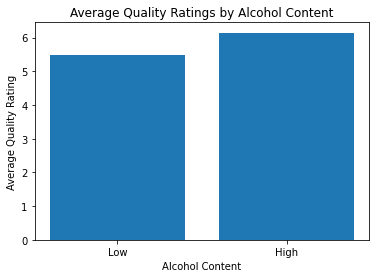

In [5]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### 2. Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual suger and one bar for high residual sugar wine samples.

In [9]:
# Use query to select each group and get its mean quality
median = df['residual sugar'].median()
low = df.query(f'`residual sugar` < {median}')
high = df.query(f'`residual sugar` >= {median}')

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

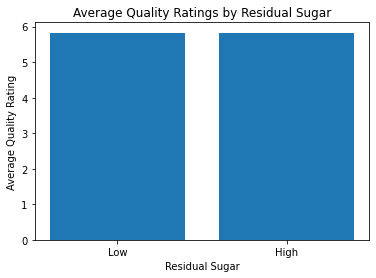

In [10]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### 3. What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels

In [12]:
# Use groupby to get the mean quality for each acidity level
acidity_level_quality_means = df.groupby('acidity levels').quality.mean()
acidity_level_quality_means

acidity levels
high        5.783343
low         5.859593
medium      5.850832
mod_high    5.784540
Name: quality, dtype: float64

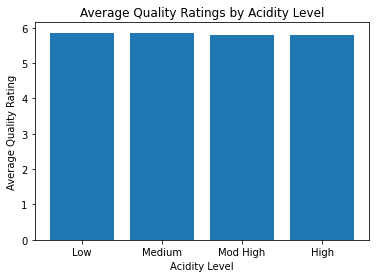

In [13]:
# Create a bar chart with proper labels
locations = [4, 1, 2, 3] # reorder values to go from low to high
heights = acidity_level_quality_means

# Labels = ['Low', 'Medium', 'Moderately High', "High"]
labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title()

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

### Bonus: Create a line plot for the data in # 3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?